In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [260]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')

In [261]:
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

In [262]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

In [263]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

In [264]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S') # Added seconds to the format string
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

In [265]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

In [266]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 4.6+ MB


In [267]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

<code style="background:yellow;color:red">There is no Missing Values in the dataset </code>

In [268]:
df_solar.describe().style.background_gradient(cmap='rainbow')

In [269]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  SOURCE_KEY_NUMBER  
0            27.004764           25.060789          0.0                  0  
1            27.004764           25.060789          0.0                  1  
2            27.004764           25.060789          0.0                  2  
3            27.004764           25.060789          0.0                  3  
4            27.004764           25.060789          0.0                  4

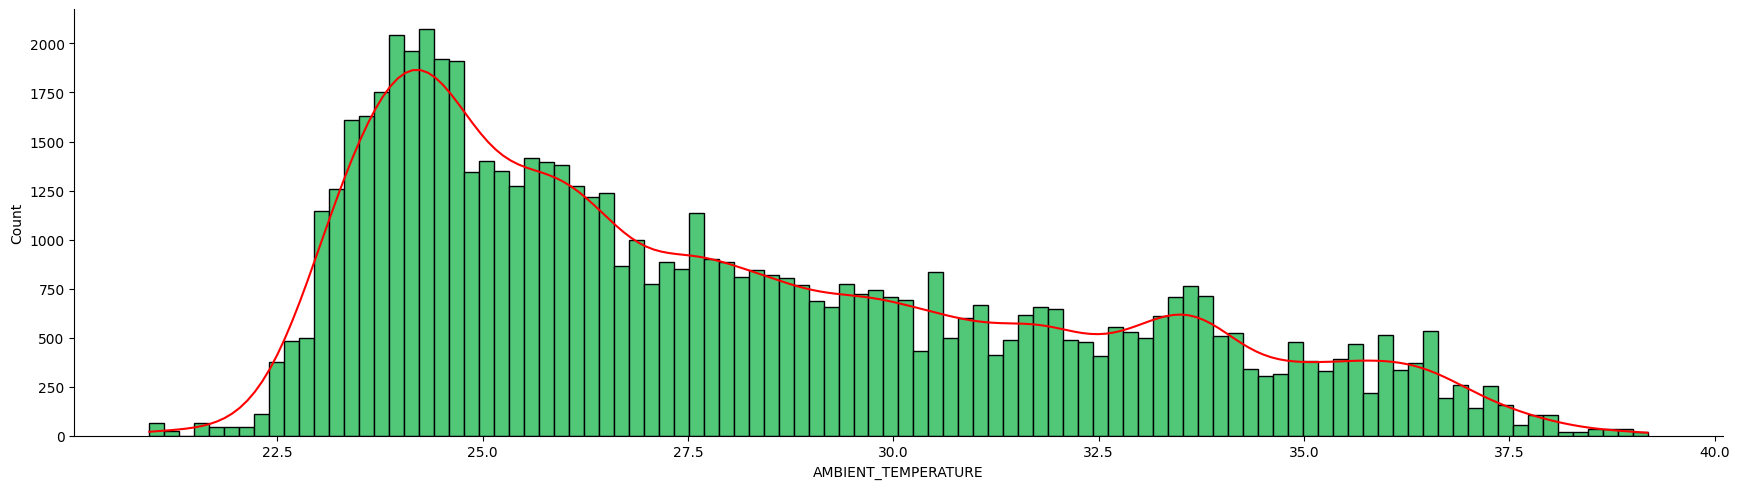

In [270]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#50C878",height = 5, aspect = 3.5);

In [271]:
df_solar.columns

Index(['DATE_TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'SOURCE_KEY_NUMBER'],
      dtype='object')

In [272]:
df_solar['DATE_TIME'] = pd.to_datetime(df_solar['DATE_TIME'])


def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')



<span class="label label-default" style="background-color:pink; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:Red; ">Ideal Graph of Solar Power Generation 📊📈</span>

<img src="https://www.solarmarket.com.au/wp-content/uploads/2021/04/solar-output-graph.png" alt="Solar Panel" width="50%">
</center>

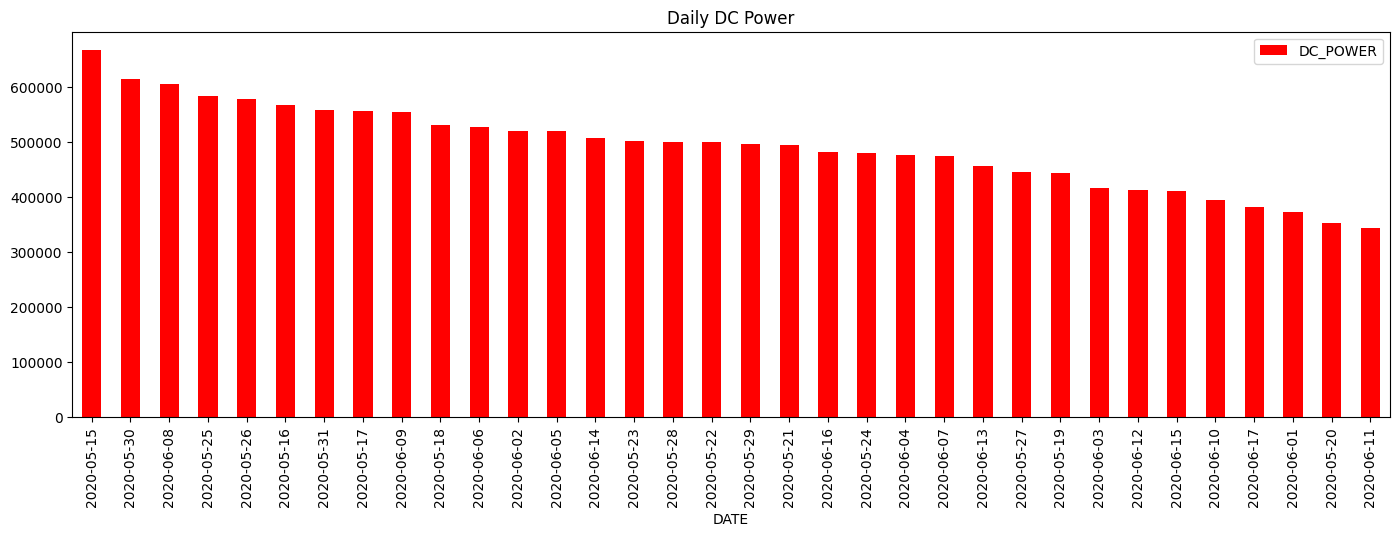

In [273]:
df_solar['DATE'] = df_solar['DATE_TIME'].dt.date

daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

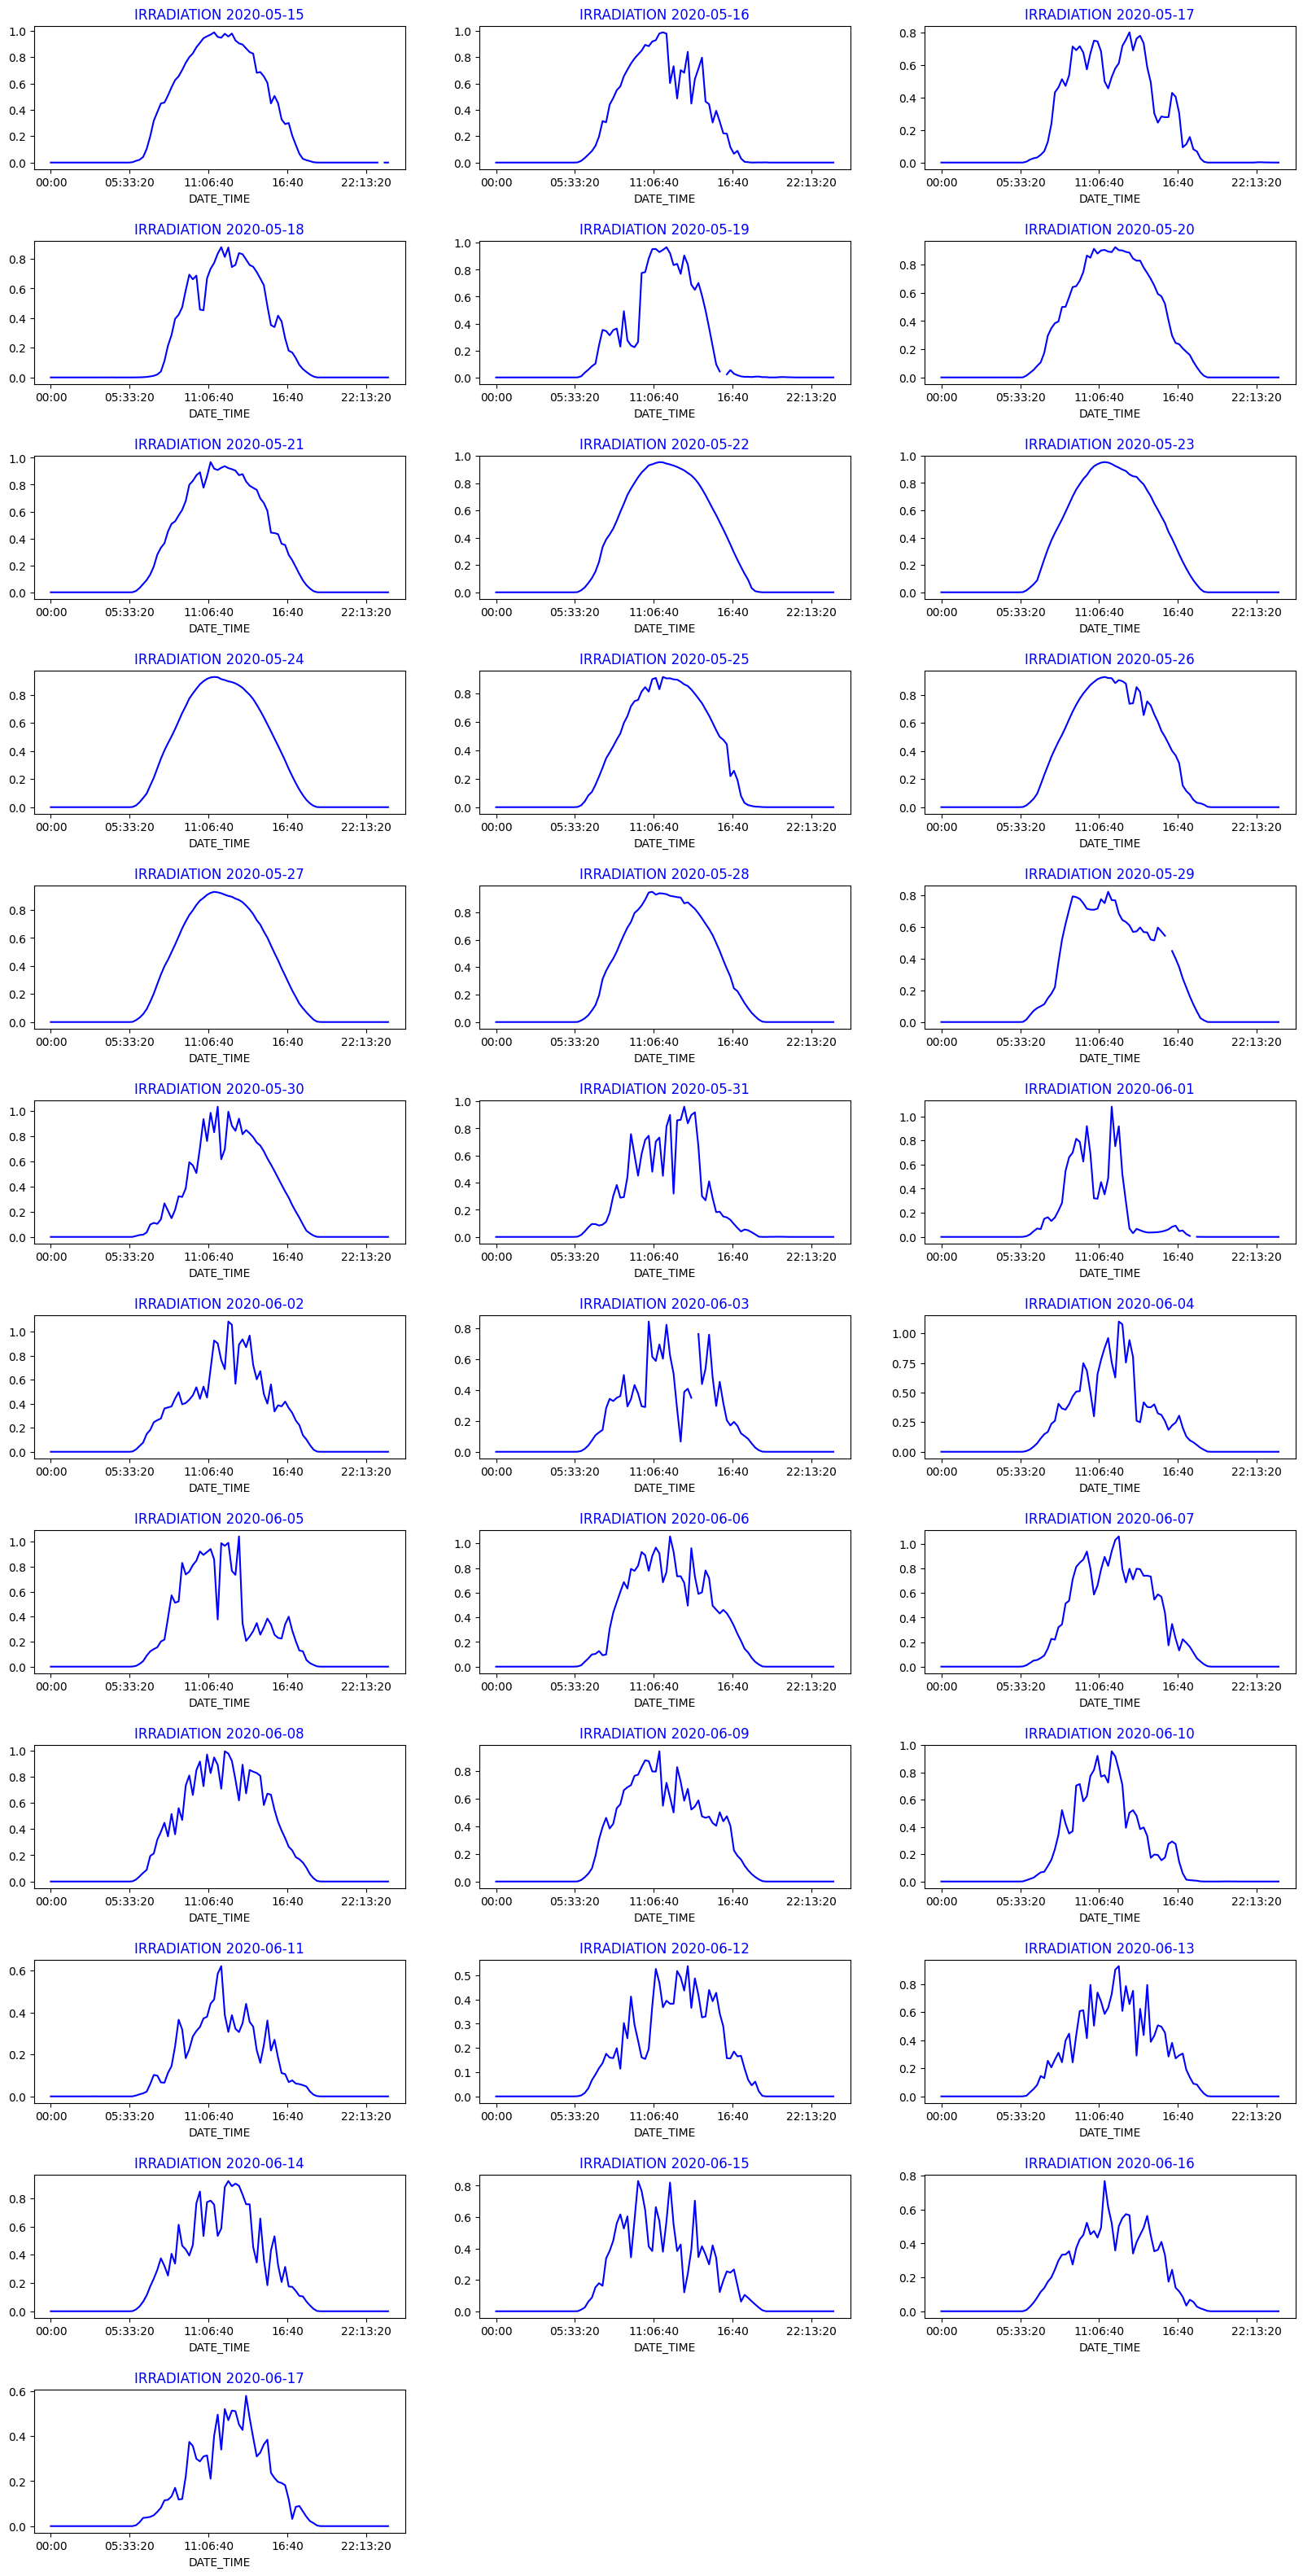

In [274]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index=df_solar['DATE_TIME'].dt.time, columns='DATE')
def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

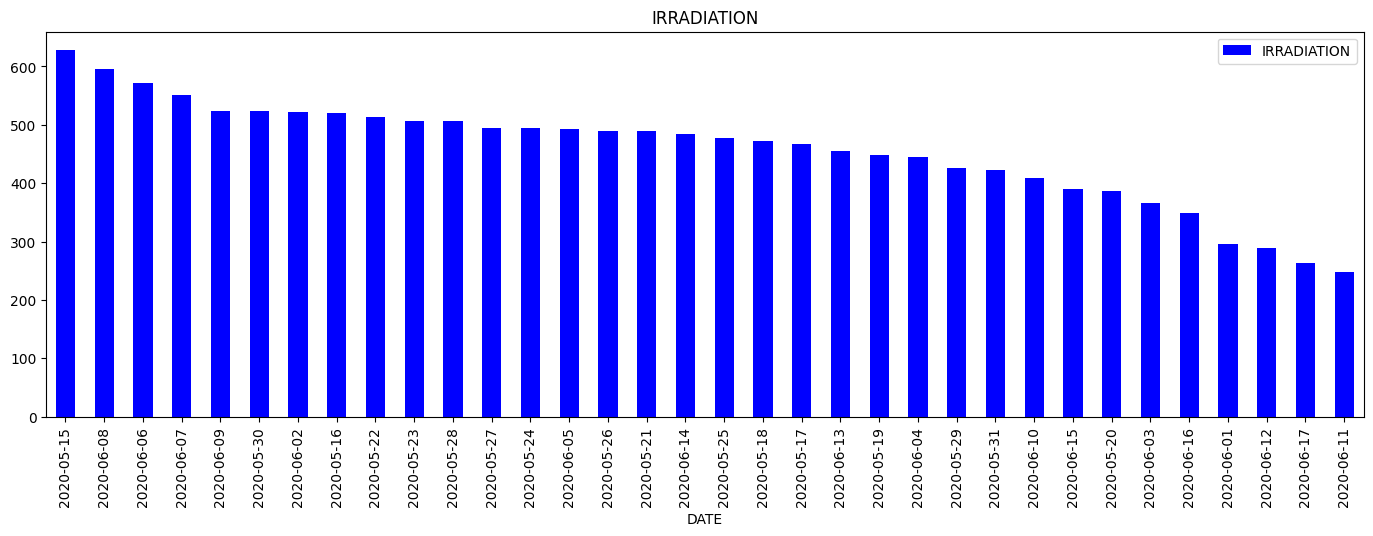

In [275]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

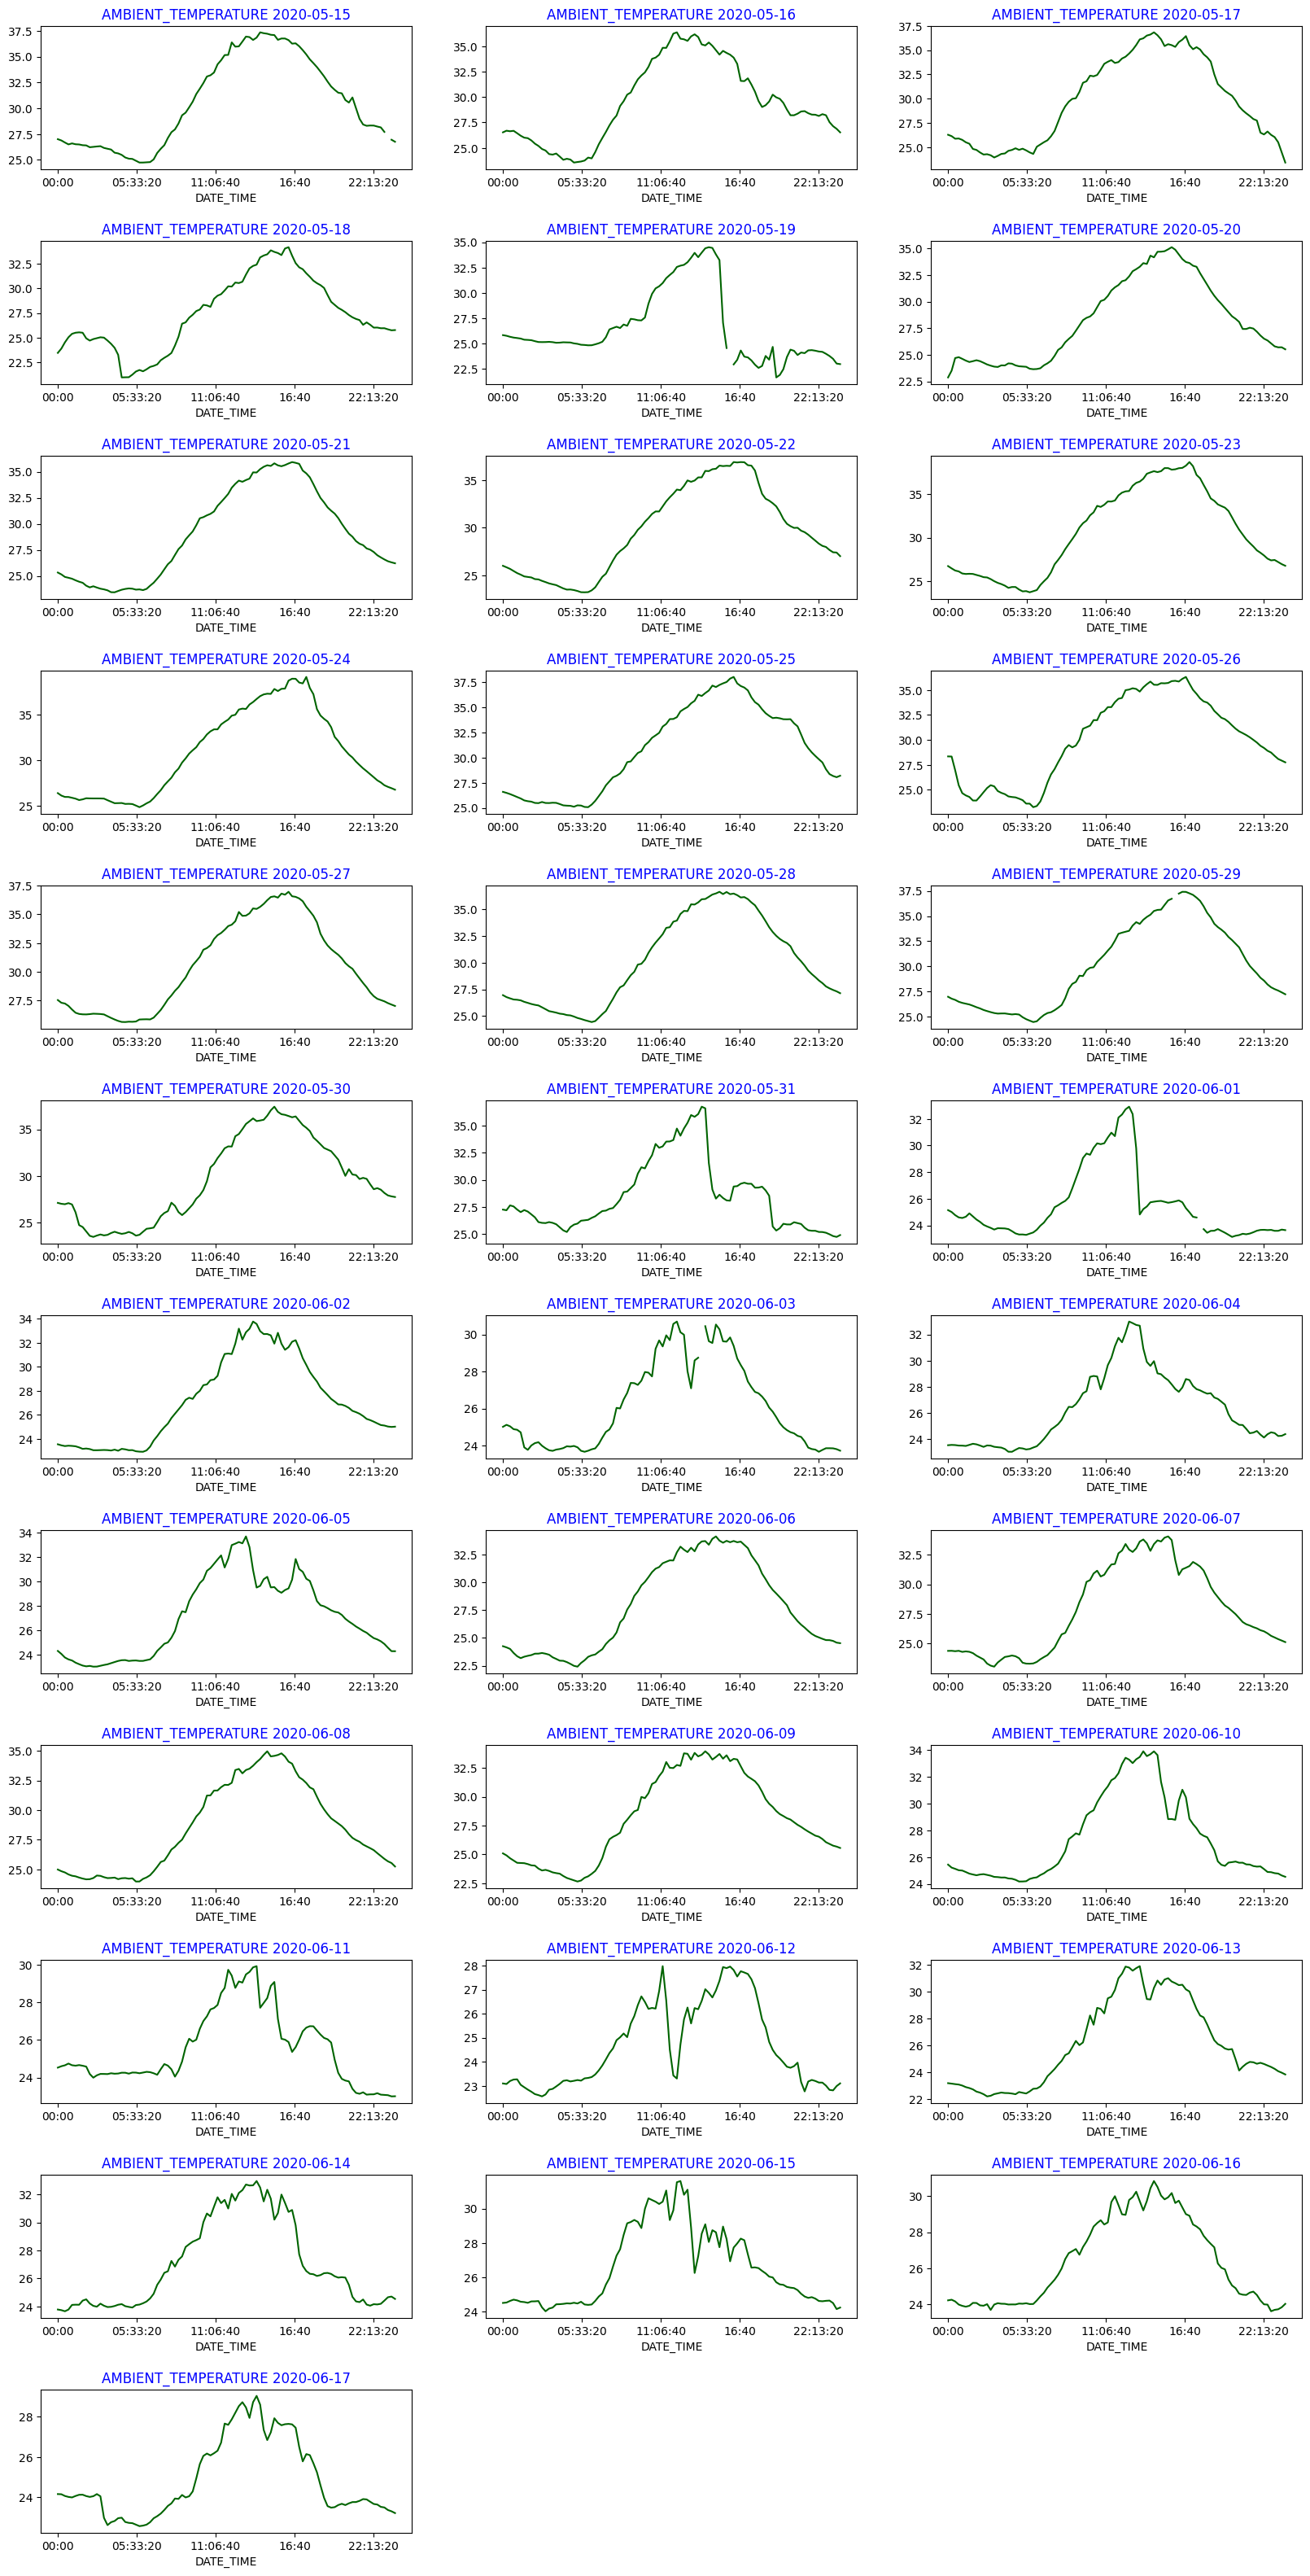

In [276]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index=df_solar['DATE_TIME'].dt.time, columns='DATE') # Use the existing 'DATE_TIME' column and extract the time component using .dt.time

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

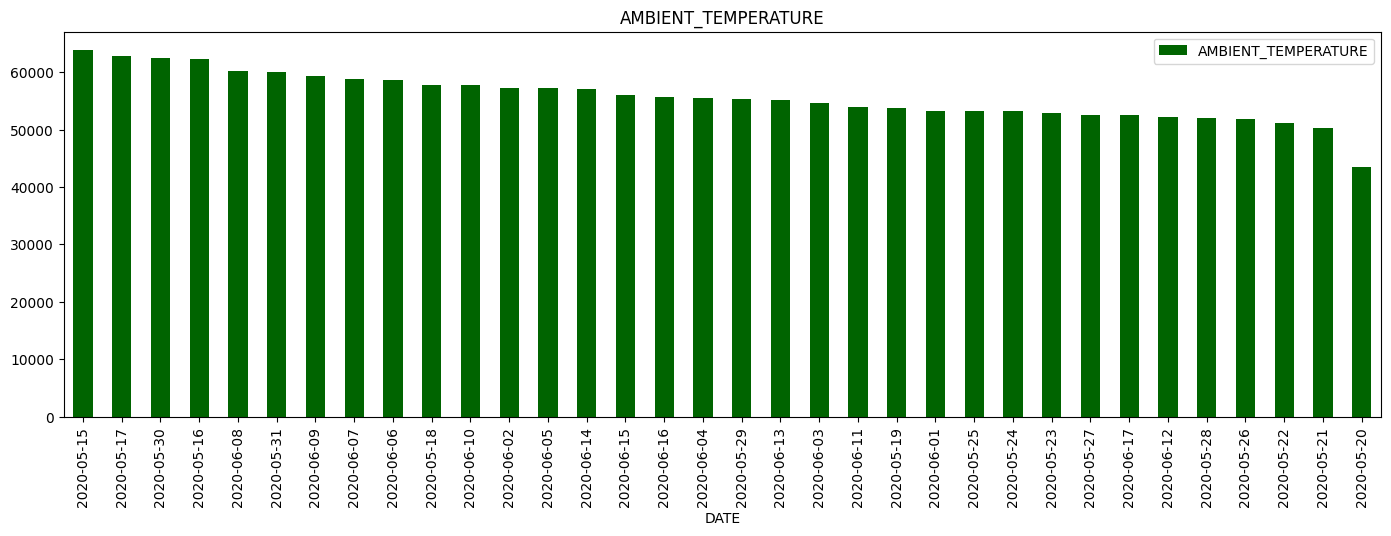

In [277]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

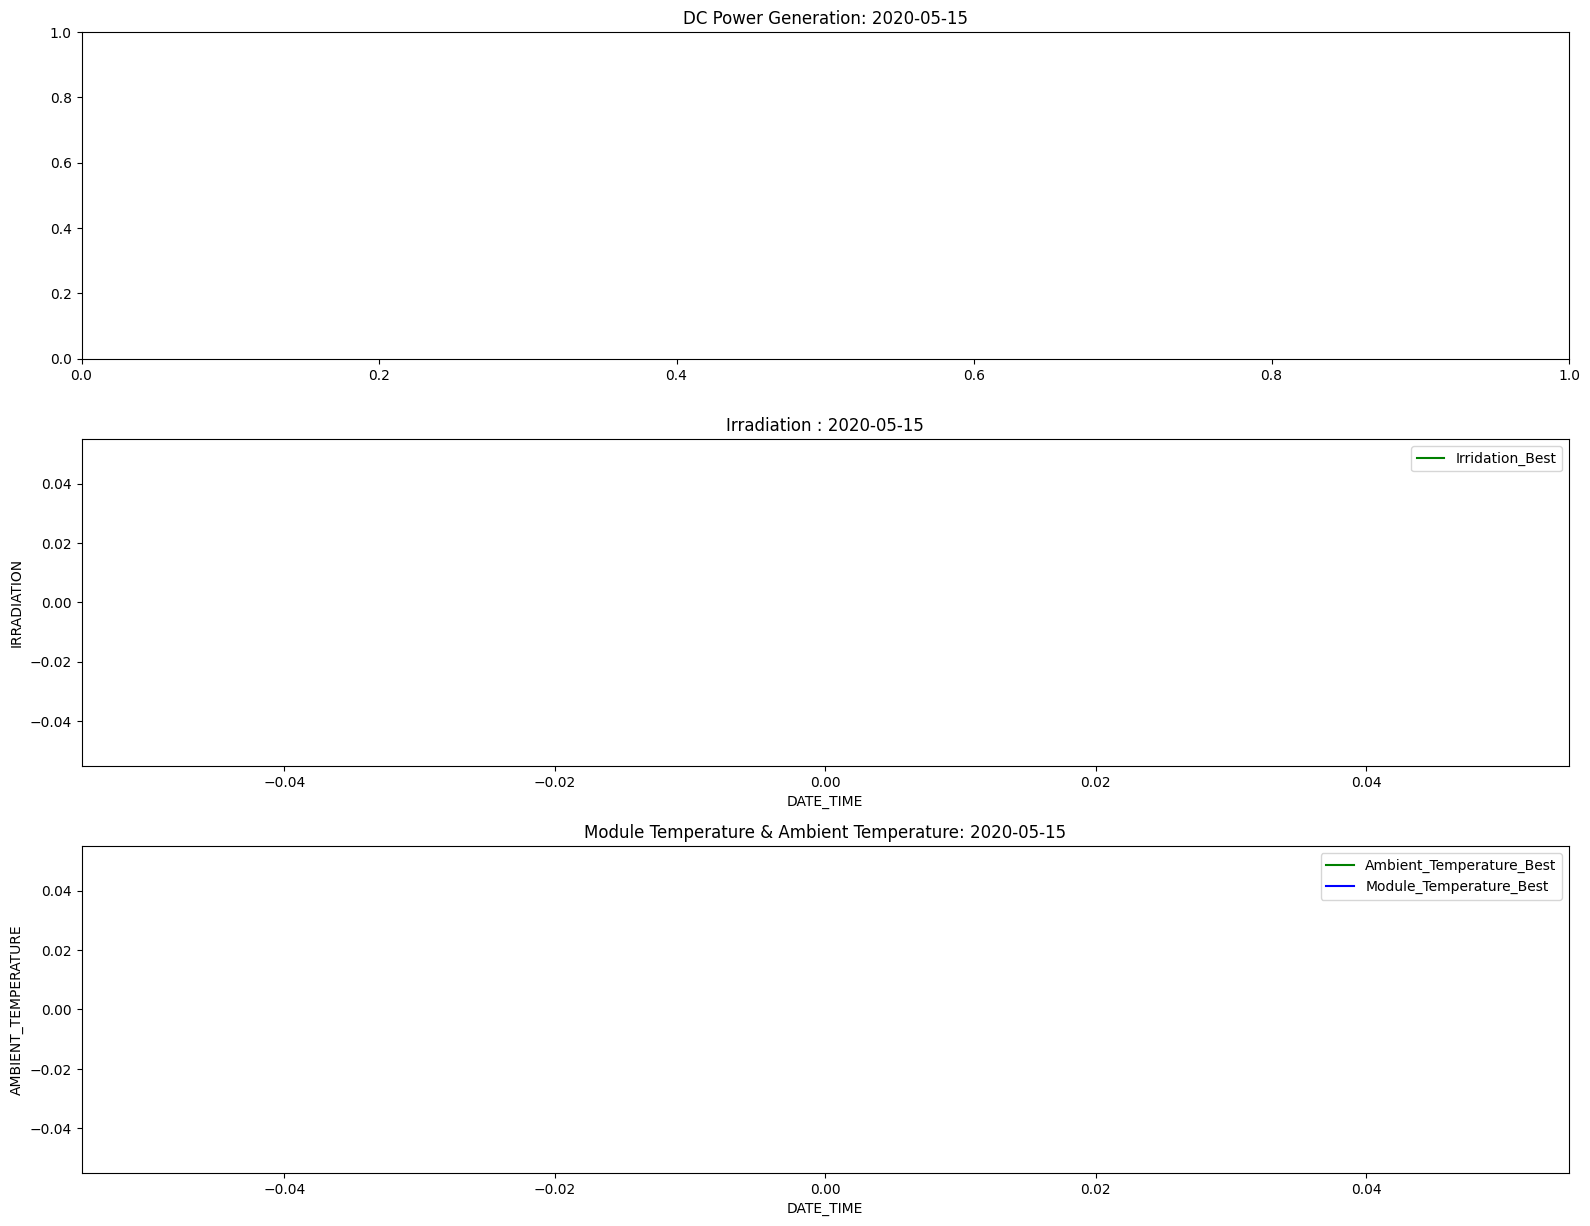

In [278]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
# Check if 'DATE' is the correct column name instead of 'DATE_STRING'
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
# Pass x and y as keyword arguments to sns.lineplot
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_solar[df_solar["DATE"].isin(date)], label="Irridation_Best",color='green')
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_solar[df_solar["DATE"].isin(date)], label="Ambient_Temperature_Best",color='green');
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_solar[df_solar["DATE"].isin(date)], label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

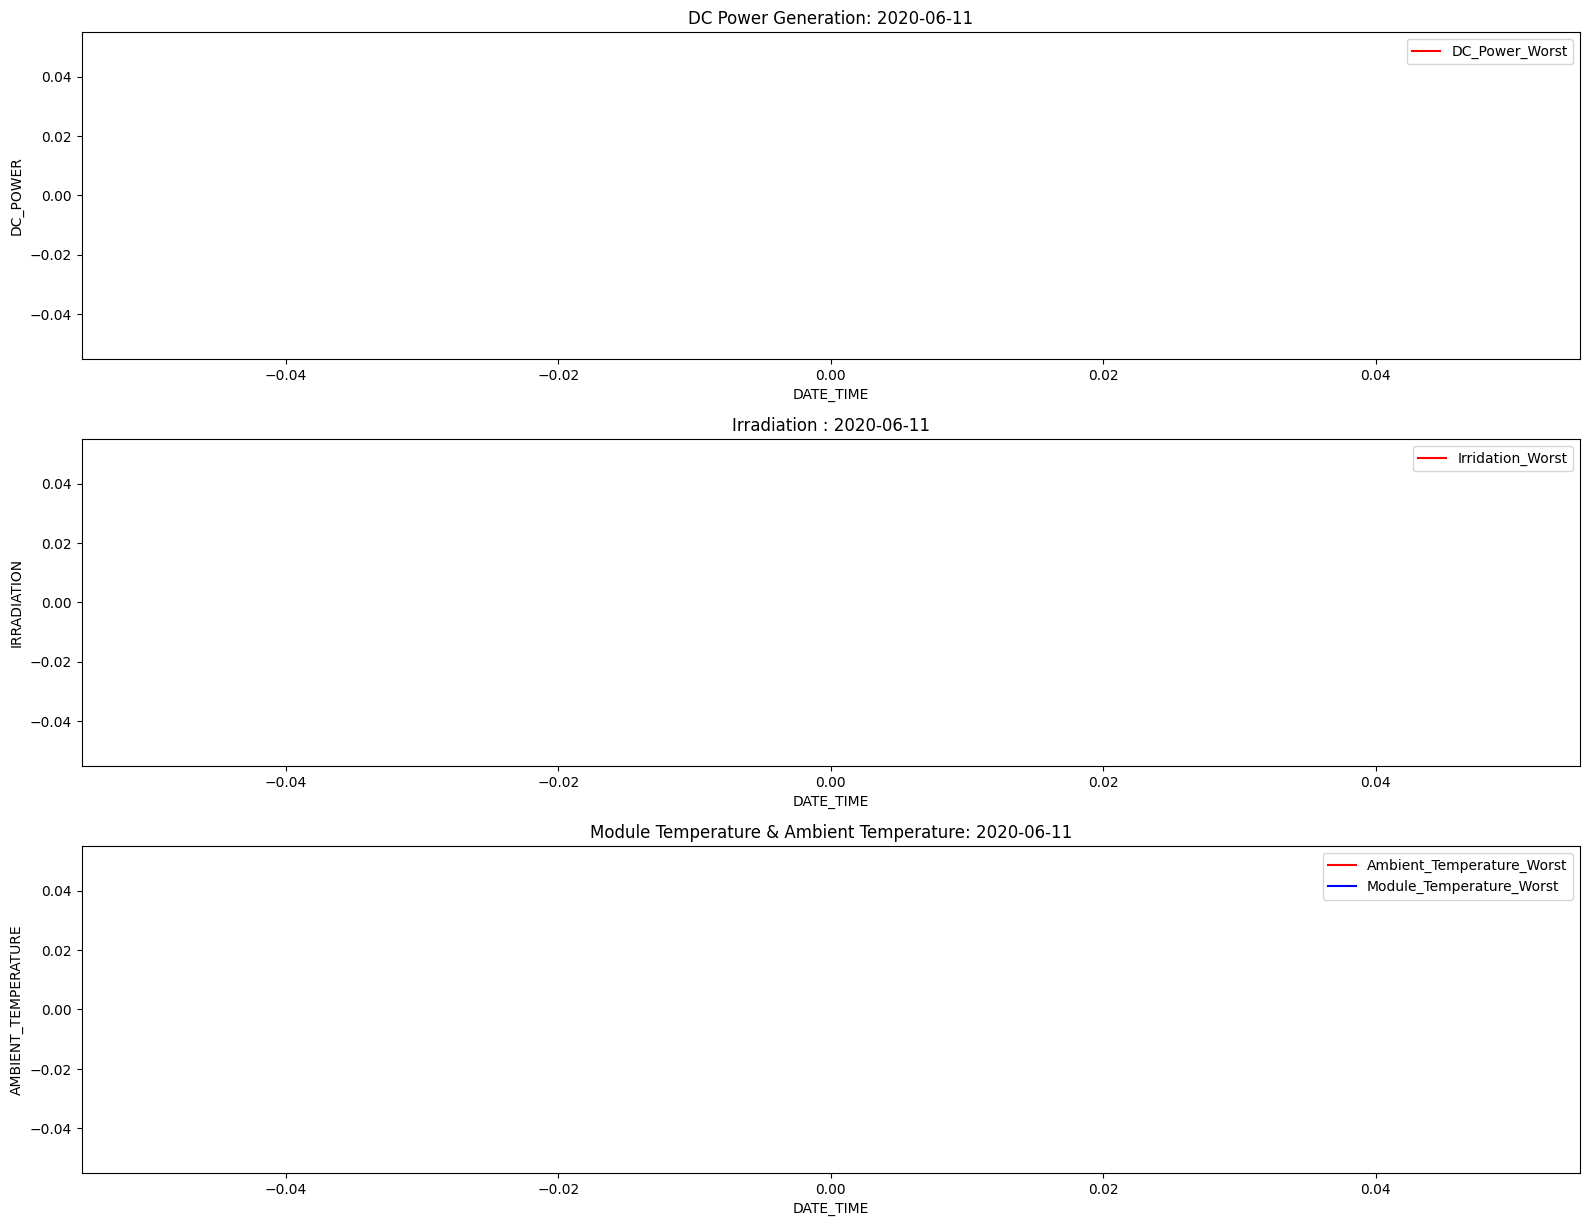

In [279]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
# Replace 'DATE_STRING' with 'DATE' and pass x and y as keyword arguments
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_solar[df_solar["DATE"].isin(date)], label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
# Replace 'DATE_STRING' with 'DATE' and pass x and y as keyword arguments
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_solar[df_solar["DATE"].isin(date)], label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
# Replace 'DATE_STRING' with 'DATE' and pass x and y as keyword arguments
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_solar[df_solar["DATE"].isin(date)], label="Ambient_Temperature_Worst",color='red');
# Replace 'DATE_STRING' with 'DATE' and pass x and y as keyword arguments
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_solar[df_solar["DATE"].isin(date)], label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

In [280]:
#sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

In [281]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [282]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [283]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [284]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

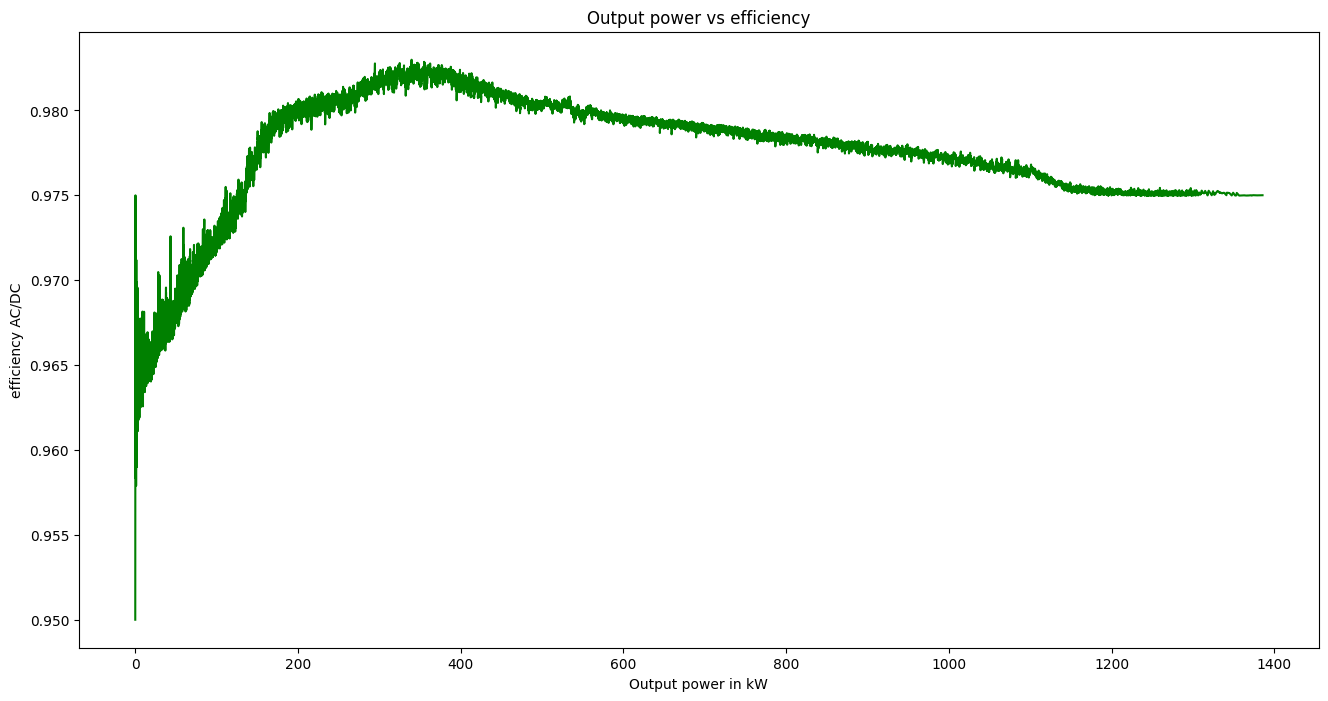

In [285]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

In [286]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [287]:
X.head()

DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  9425.000000  2.429011e+06            27.004764           25.060789   
1     0.000000  1.215279e+09            27.004764           25.060789   
2  3075.333333  2.247720e+09            27.004764           25.060789   
3   269.933333  1.704250e+06            27.004764           25.060789   
4  3177.000000  1.994153e+07            27.004764           25.060789   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [288]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [289]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [291]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [292]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [293]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


In [294]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.72812381 ...    0.         1007.14153333
    0.        ]


In [295]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

Actual   Predicted
40426    0.000000    0.000000
50974    0.000000    0.000000
53919  684.913333  684.728124
2384     0.000000    0.000000
22014    0.000000    0.000000

In [296]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

Actual   Predicted    Error
40426    0.000000    0.000000  0.00000
50974    0.000000    0.000000  0.00000
53919  684.913333  684.728124  0.18521
2384     0.000000    0.000000  0.00000
22014    0.000000    0.000000  0.00000

In [297]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [298]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S') # Added seconds to the format string
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')
df = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0  9425.000000  2.429011e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0     0.000000  1.215279e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0  3075.333333  2.247720e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0   269.933333  1.704250e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764           25.060789          0.0  
3            27.004764           25.060789          0.0  
4            27.004764           25.060789          0.0

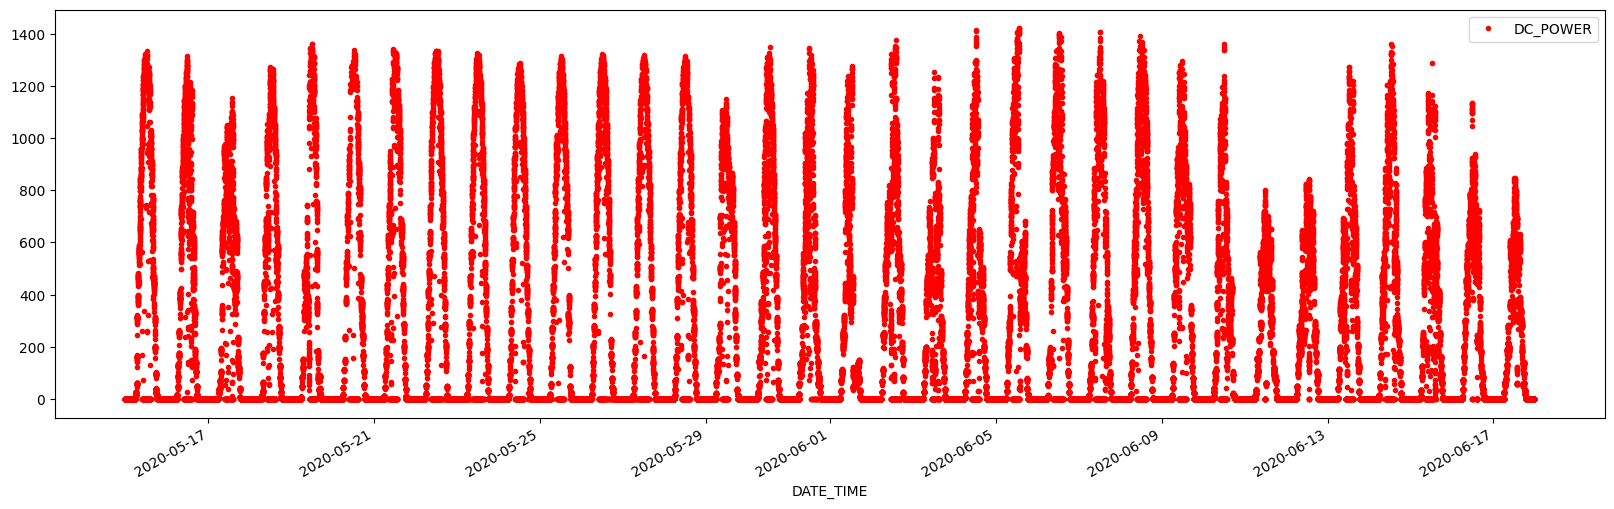

In [299]:
df.plot(x= 'DATE_TIME', y='DC_POWER', style='.', figsize = (20, 6),color= "red");

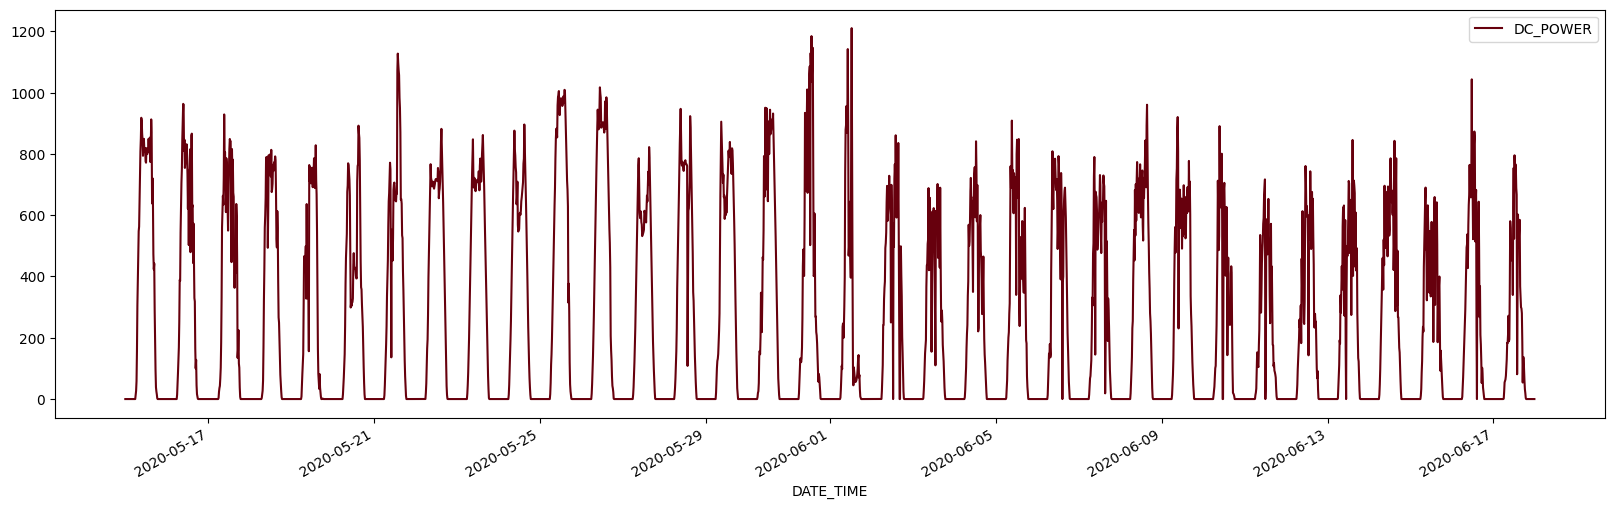

In [300]:
df.groupby('DATE_TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r',figsize = (20, 6));

In [301]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

data = go.Bar(x = df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}). \
              reset_index()['SOURCE_KEY'],
              y = df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}). \
              reset_index()['TOTAL_YIELD'],
              width=[0.5, 0.5],
              text =round(df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}).reset_index()['TOTAL_YIELD'],2),
              textposition= 'outside',
              textfont = dict(size = 26,
                             color = 'deeppink'),
              marker = dict(color = 'pink',
                            line_color = 'deeppink',
                            line_width = 3,
                            opacity = 0.65))

layout = go.Layout(title = {'text': "Avg TOTAL_YIELD by SOURCE_KEY",
                           'y':1.0,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top'},
                   xaxis = dict(title = 'SOURCE_KEY'),
                   yaxis =dict(title = 'TOTAL_YIELD'),
                   width = 1400,
                   height = 700,
                   template = 'simple_white')

fig=go.Figure(data = data, layout = layout)
iplot(fig)

In [302]:
import plotly.express as px
fig = px.sunburst(df, path=['SOURCE_KEY'], values='DAILY_YIELD',color='MODULE_TEMPERATURE')
fig.update_layout (height = 800 , width = 800)
fig.show()

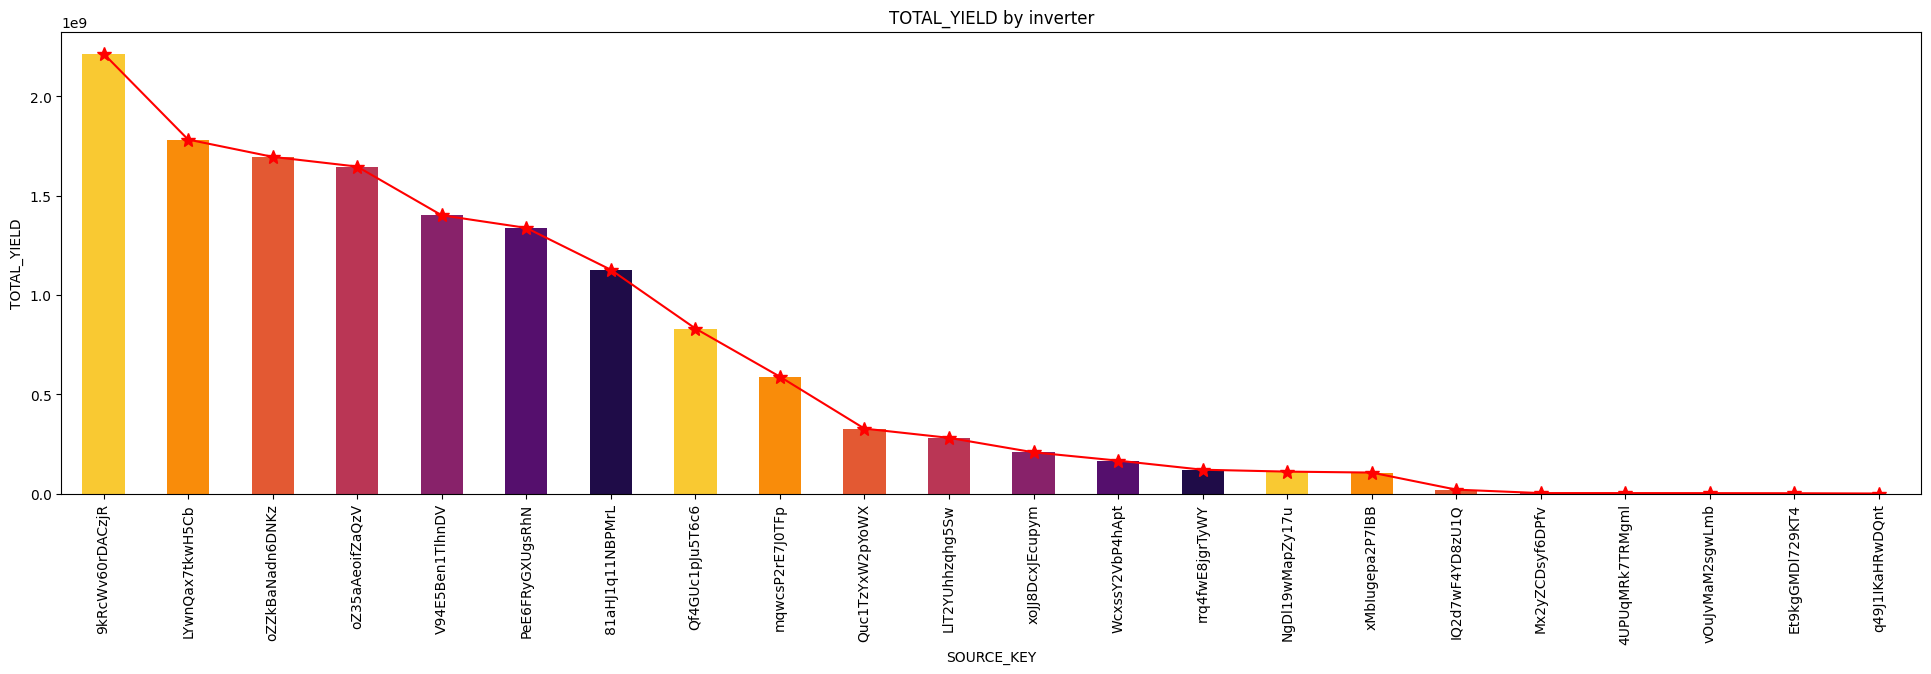

In [303]:
plt.figure(figsize=(24,6))
plt.title('TOTAL_YIELD by inverter')
plt.ylabel('TOTAL_YIELD')
df.groupby('SOURCE_KEY')['TOTAL_YIELD'].mean().sort_values(ascending=False).plot(kind='line', marker='*', color='red', ms=10)
df.groupby('SOURCE_KEY')['TOTAL_YIELD'].mean().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

In [304]:
import plotly.graph_objects as go
import plotly.express as px

labels = df['SOURCE_KEY']
values =df['TOTAL_YIELD']
fig = go.Figure(data = [go.Pie(labels = labels , values = values ,
         textinfo = 'label+percent' , hole =0.3, pull = [.1, 0, 0, 0])])
fig.show()

In [305]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter(df, x = 'DAILY_YIELD', y = 'IRRADIATION', log_x=True,
                 hover_name="SOURCE_KEY", hover_data=["DAILY_YIELD", "IRRADIATION"],
                color = 'DAILY_YIELD', color_continuous_scale= 'rainbow',
                title = 'Quality or Quantity, That\'s the question')
fig.show()

In [306]:
import plotly.express as px
import plotly.graph_objs as go

dfpie = df.loc[df.groupby('SOURCE_KEY')['AMBIENT_TEMPERATURE'].idxmax()]
fig = px.bar(dfpie, x = 'SOURCE_KEY', y = 'AMBIENT_TEMPERATURE',
            text = 'SOURCE_KEY', color = 'DAILY_YIELD',
            title = 'Max AMBIENT_TEMPERATURE')
fig.show()

In [307]:
df['SOURCE_KEY'].value_counts()

SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

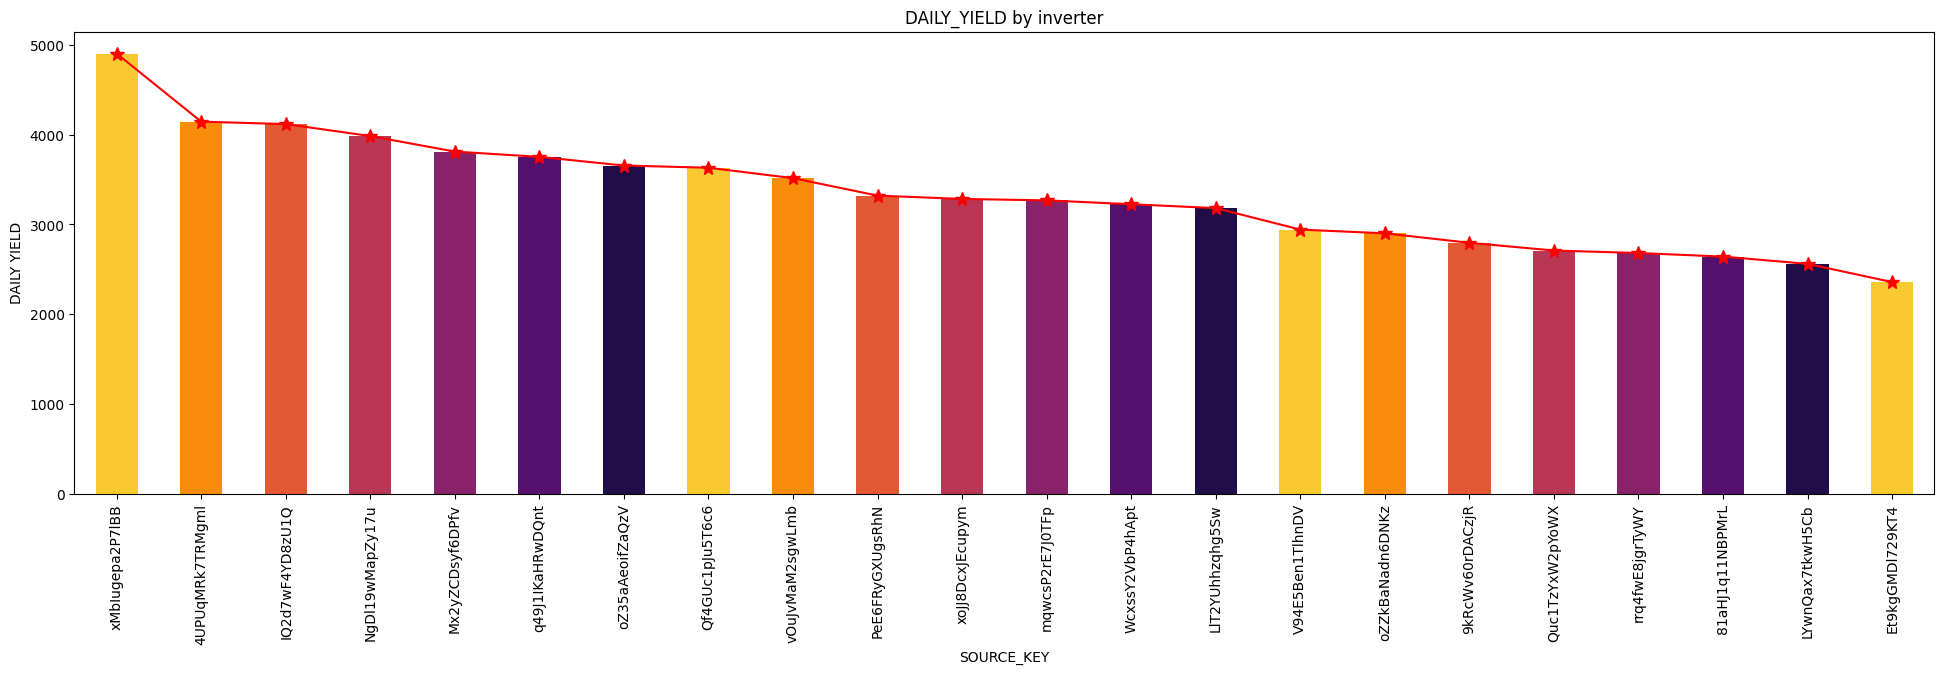

In [308]:
plt.figure(figsize=(24,6))
plt.title('DAILY_YIELD by inverter')
plt.ylabel('DAILY YIELD')
df.groupby('SOURCE_KEY')['DAILY_YIELD'].mean().sort_values(ascending=False).plot(kind='line', marker='*', color='red', ms=10)
df.groupby('SOURCE_KEY')['DAILY_YIELD'].mean().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

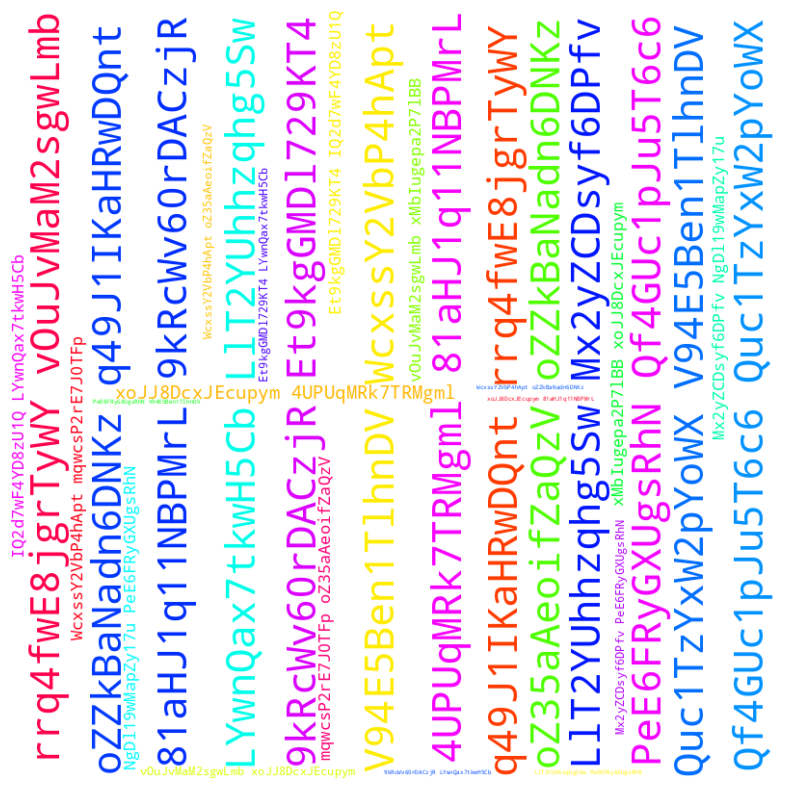

In [309]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
all_text=" ".join(df['SOURCE_KEY'].values.tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=800,colormap="hsv").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

DC_POWER    AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
DATE_TIME                                                       
2020-05-15  318.951020  311.692697  3826.512932  6.447034e+08   
2020-05-16  268.390076  262.430616  3425.500902  6.377676e+08   

            AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DATE_TIME                                                         
2020-05-15            30.565992           35.559493     0.300622  
2020-05-16            29.478612           35.143314     0.246631

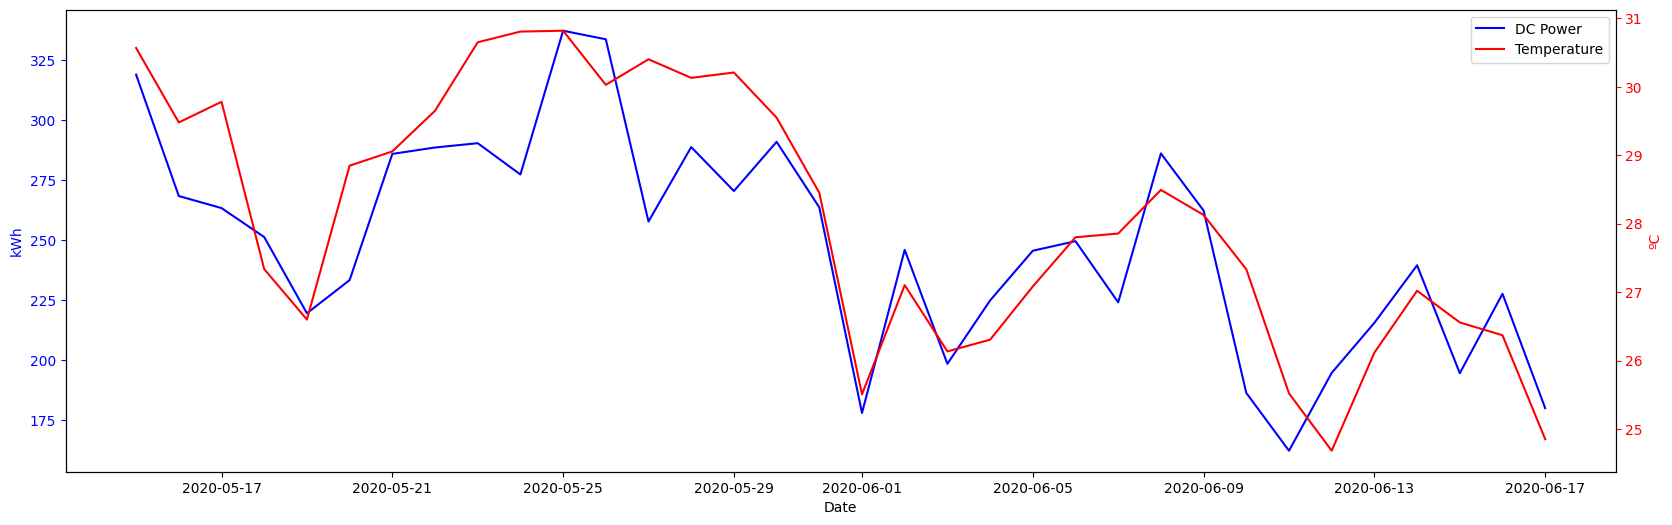

In [310]:
df1 = df.set_index('DATE_TIME')
daily_data = df1.resample('24h').mean(numeric_only=True) # Only calculate the mean of numeric columns
display(daily_data.head(2))

fig, ax1 = plt.subplots(figsize=(20,6))
ax1.plot(daily_data.index, daily_data['DC_POWER'], 'b', label='DC Power')
ax1.set_xlabel('Date')
ax1.set_ylabel('kWh', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(daily_data.index, daily_data['AMBIENT_TEMPERATURE'], 'r', label='Temperature')
ax2.set_ylabel('ºC', color='r')
ax2.tick_params('y', colors='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')
plt.show()

In [311]:
import plotly.express as px
import plotly.graph_objs as go

dfpie = df1.groupby('SOURCE_KEY')['DAILY_YIELD'].count()
fig = px.pie(values=dfpie.values, names=dfpie.index,
            title = 'Proportional Analysis of DAILY_YIELD with SOURCE_KEY')
fig.show()

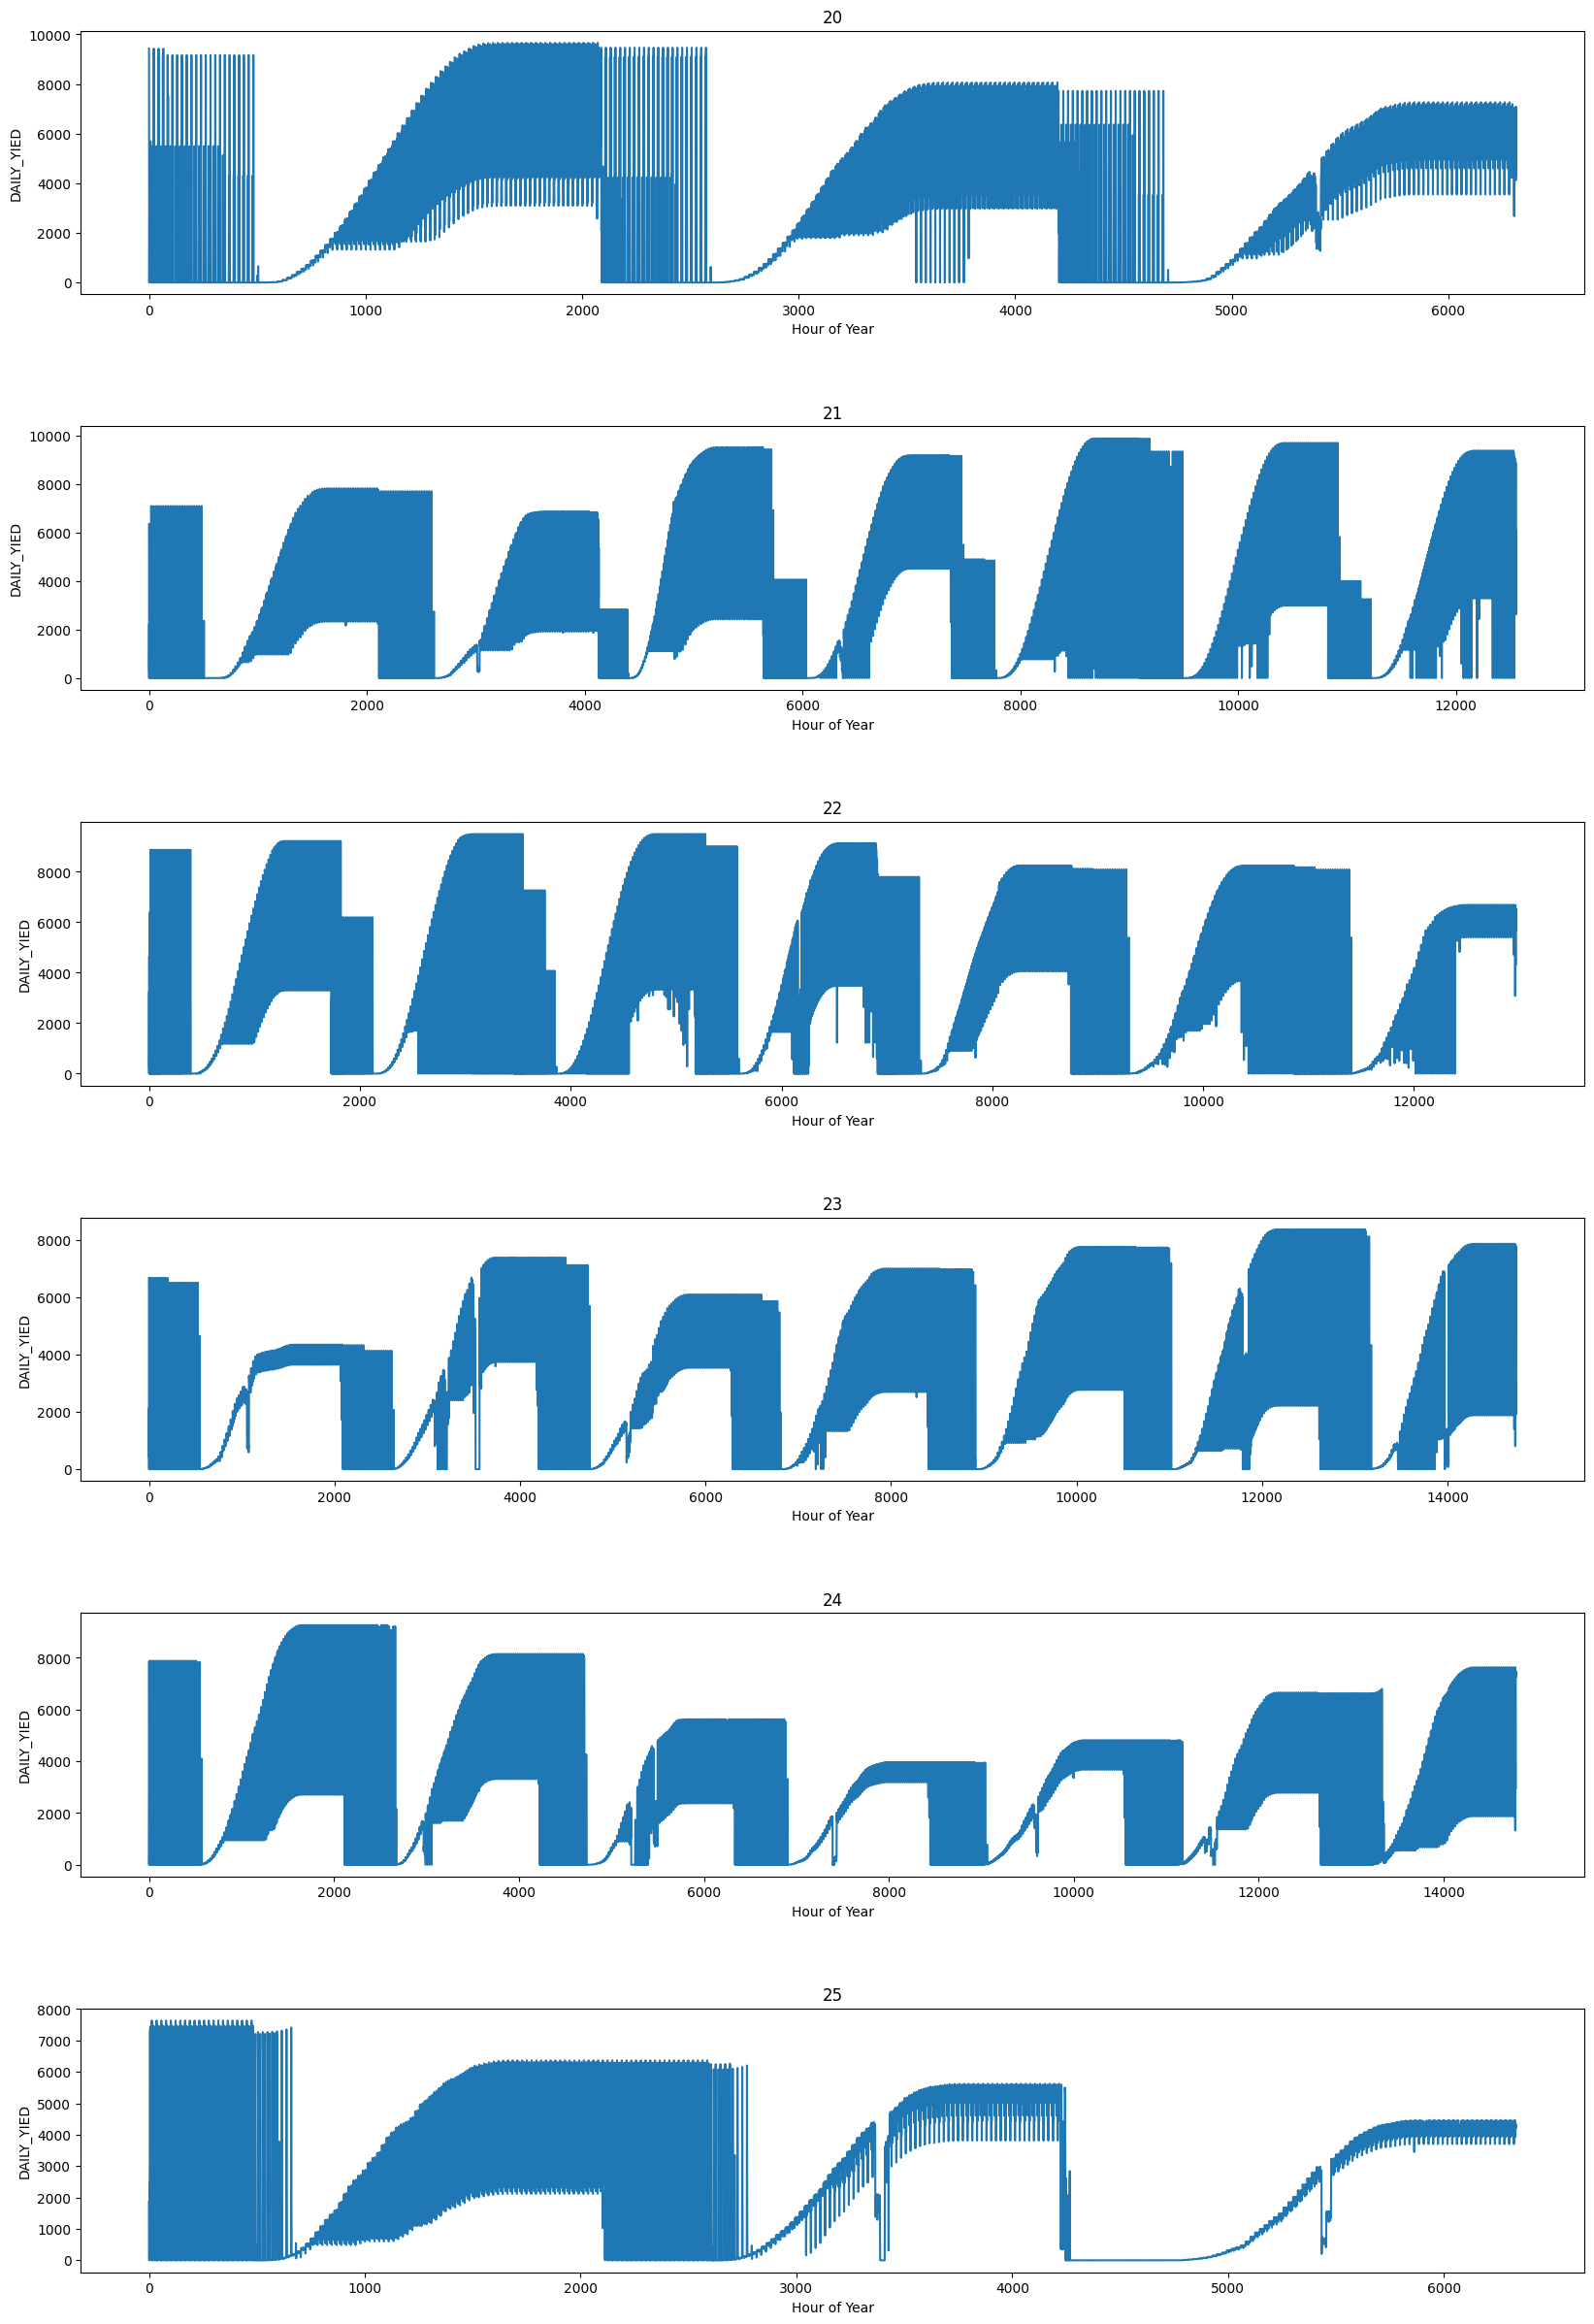

In [312]:
#group data by week
groups = df1['DAILY_YIELD'].groupby(pd.Grouper(freq='W'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(20,30))
for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('DAILY_YIED')
    ax.set_title(name.week)
    plt.subplots_adjust(hspace=0.5)

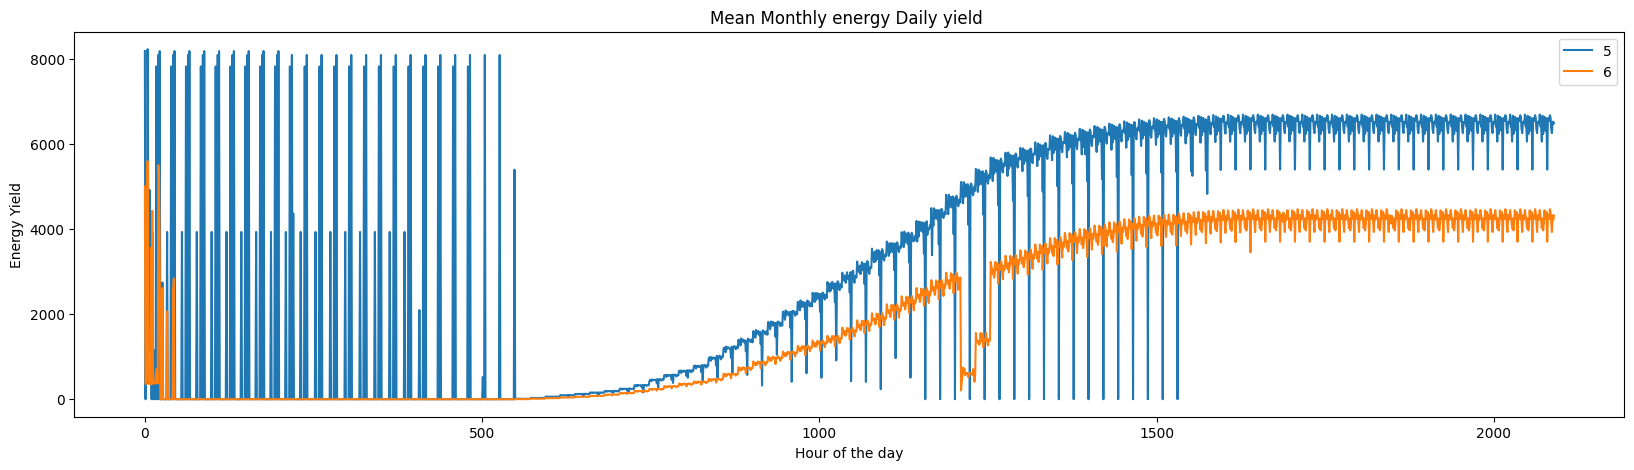

In [313]:
group_hours = df1['DAILY_YIELD'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(20,5))

year_demands = pd.DataFrame()

for name, group in group_hours:
    year_demands[name.month] = pd.Series(group.values)

year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Yield')
axs.set_title('Mean Monthly energy Daily yield ');